### Importing Libraries

In [1]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical

In [2]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [3]:
image_directory='datasets/'

In [4]:
no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')
dataset=[]
label=[]

Mri Images Contaning No Brain Tumor


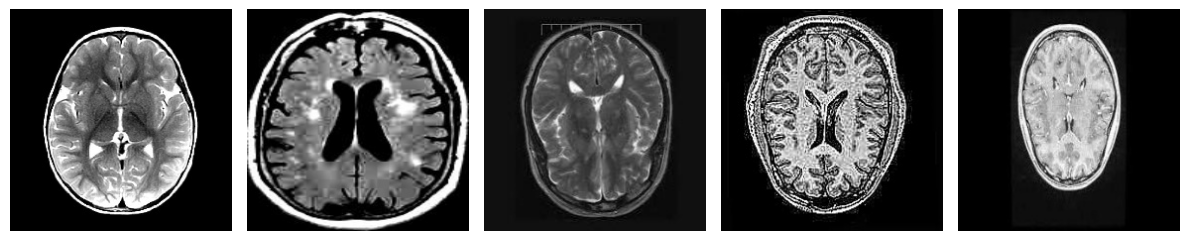

In [5]:
no_folder = os.path.join(image_directory, 'no')
yes_folder = os.path.join(image_directory, 'yes')

# Get the list of file names for 'no' and 'yes' folders
no_images = os.listdir(no_folder)[:5]  # Select the first 5 images
yes_images = os.listdir(yes_folder)[:5]  # Select the first 5 images

# Displaying 'no' images
plt.figure(figsize=(12, 6))
bold_text = "\033[1mMri Images Contaning No Brain Tumor\033[0m"
print(bold_text)
for i, image_name in enumerate(no_images):
    image_path = os.path.join(no_folder, image_name)
    img = Image.open(image_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

Mri Images Containing Brain Tumor


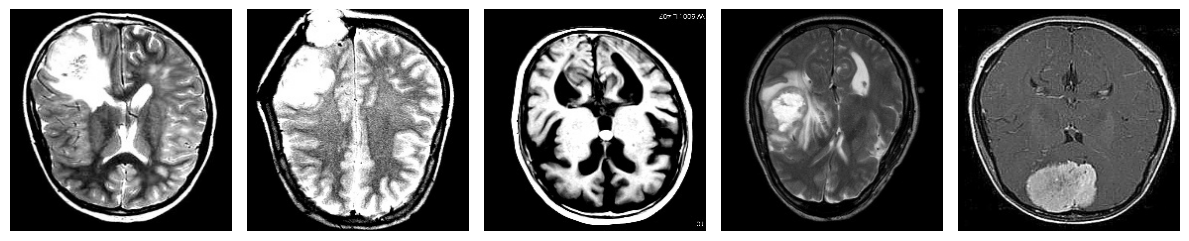

In [6]:
# Displaying 'yes' images
plt.figure(figsize=(12, 6))
bold_text = "\033[1mMri Images Containing Brain Tumor\033[0m"
print(bold_text)
for i, image_name in enumerate(yes_images):
    image_path = os.path.join(yes_folder, image_name)
    img = Image.open(image_path)
    plt.subplot(2, 5, i+6)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

### preprocessing and Resizing Dataset

In [7]:
IMG_SIZE = (224,224)

In [8]:
import os
import cv2

def resize_images_in_folder(folder_path, target_size=(224, 224)):
    """
    Resize all images in a folder to the target size and save them back to the same folder.
    """
    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)
    
    # Iterate over each file
    for file_name in file_list:
        # Check if the file is a JPEG image
        if file_name.lower().endswith('.jpg'):
            # Read the image
            image_path = os.path.join(folder_path, file_name)
            img = cv2.imread(image_path)
            
            # Resize the image
            resized_img = cv2.resize(img, target_size)
            
            # Save the resized image back to the same folder
            cv2.imwrite(image_path, resized_img)

# Example usage:
folder_path = no_folder
resize_images_in_folder(folder_path)


In [9]:
import os
import cv2

def resize_images_in_folder(folder_path, target_size=(224, 224)):
    """
    Resize all images in a folder to the target size and save them back to the same folder.
    """
    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)
    
    # Iterate over each file
    for file_name in file_list:
        # Check if the file is a JPEG image
        if file_name.lower().endswith('.jpg'):
            # Read the image
            image_path = os.path.join(folder_path, file_name)
            img = cv2.imread(image_path)
            
            # Resize the image
            resized_img = cv2.resize(img, target_size)
            
            # Save the resized image back to the same folder
            cv2.imwrite(image_path, resized_img)

# Example usage:
folder_path = yes_folder
resize_images_in_folder(folder_path)

#### Converting images into numpy array

In [10]:
INPUT_SIZE=224
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [11]:
dataset=np.array(dataset)
label=np.array(label)

#### Converting data into train test split

In [12]:
x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

### VGG16 Model

In [13]:
# loading the base model
vgg16_weight_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg = VGG16(
    weights=vgg16_weight_path,
    include_top=False, 
    input_shape=IMG_SIZE + (3,)
)

In [14]:
import numpy as np 
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
from keras.layers import Input

In [15]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np
import time


# Create a Sequential model
vgg16 = Sequential()

# Add the VGG16 base model
vgg16.add(vgg)

# Add dropout layer
vgg16.add(Dropout(0.3))

# Flatten the output
vgg16.add(Flatten())

# Add another dropout layer
vgg16.add(Dropout(0.5))

# Add dense layer for classification
NUM_CLASSES = 1
vgg16.add(Dense(NUM_CLASSES, activation='sigmoid'))

# Freeze the weights of the VGG16 base model
vgg16.layers[0].trainable = False

# Compile the model
vgg16.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),  # Set your learning rate here
    metrics=['accuracy']
)

# Display model summary
vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [17]:
# Start time
start = time.time()

# Train the model
vgg16_history = vgg16.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test)
)

# End time
end = time.time()
print("Training time:", end - start)

Epoch 1/20
75/75 [==============================] - 153s 2s/step - loss: 4.9424 - accuracy: 0.6579 - val_loss: 1.2966 - val_accuracy: 0.8433
Epoch 2/20
75/75 [==============================] - 158s 2s/step - loss: 2.7400 - accuracy: 0.7821 - val_loss: 1.0186 - val_accuracy: 0.8917
Epoch 3/20
75/75 [==============================] - 160s 2s/step - loss: 1.9334 - accuracy: 0.8408 - val_loss: 0.8747 - val_accuracy: 0.9067
Epoch 4/20
75/75 [==============================] - 161s 2s/step - loss: 1.4913 - accuracy: 0.8617 - val_loss: 0.7247 - val_accuracy: 0.9267
Epoch 5/20
75/75 [==============================] - 162s 2s/step - loss: 1.1273 - accuracy: 0.8929 - val_loss: 0.6909 - val_accuracy: 0.9283
Epoch 6/20
75/75 [==============================] - 162s 2s/step - loss: 1.0335 - accuracy: 0.9050 - val_loss: 0.6504 - val_accuracy: 0.9250
Epoch 7/20
75/75 [==============================] - 163s 2s/step - loss: 0.8703 - accuracy: 0.9125 - val_loss: 0.4959 - val_accuracy: 0.9450
Epoch 8/20
75

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1792 (7.00 KB)
Trainable params: 1792 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 97ms/step


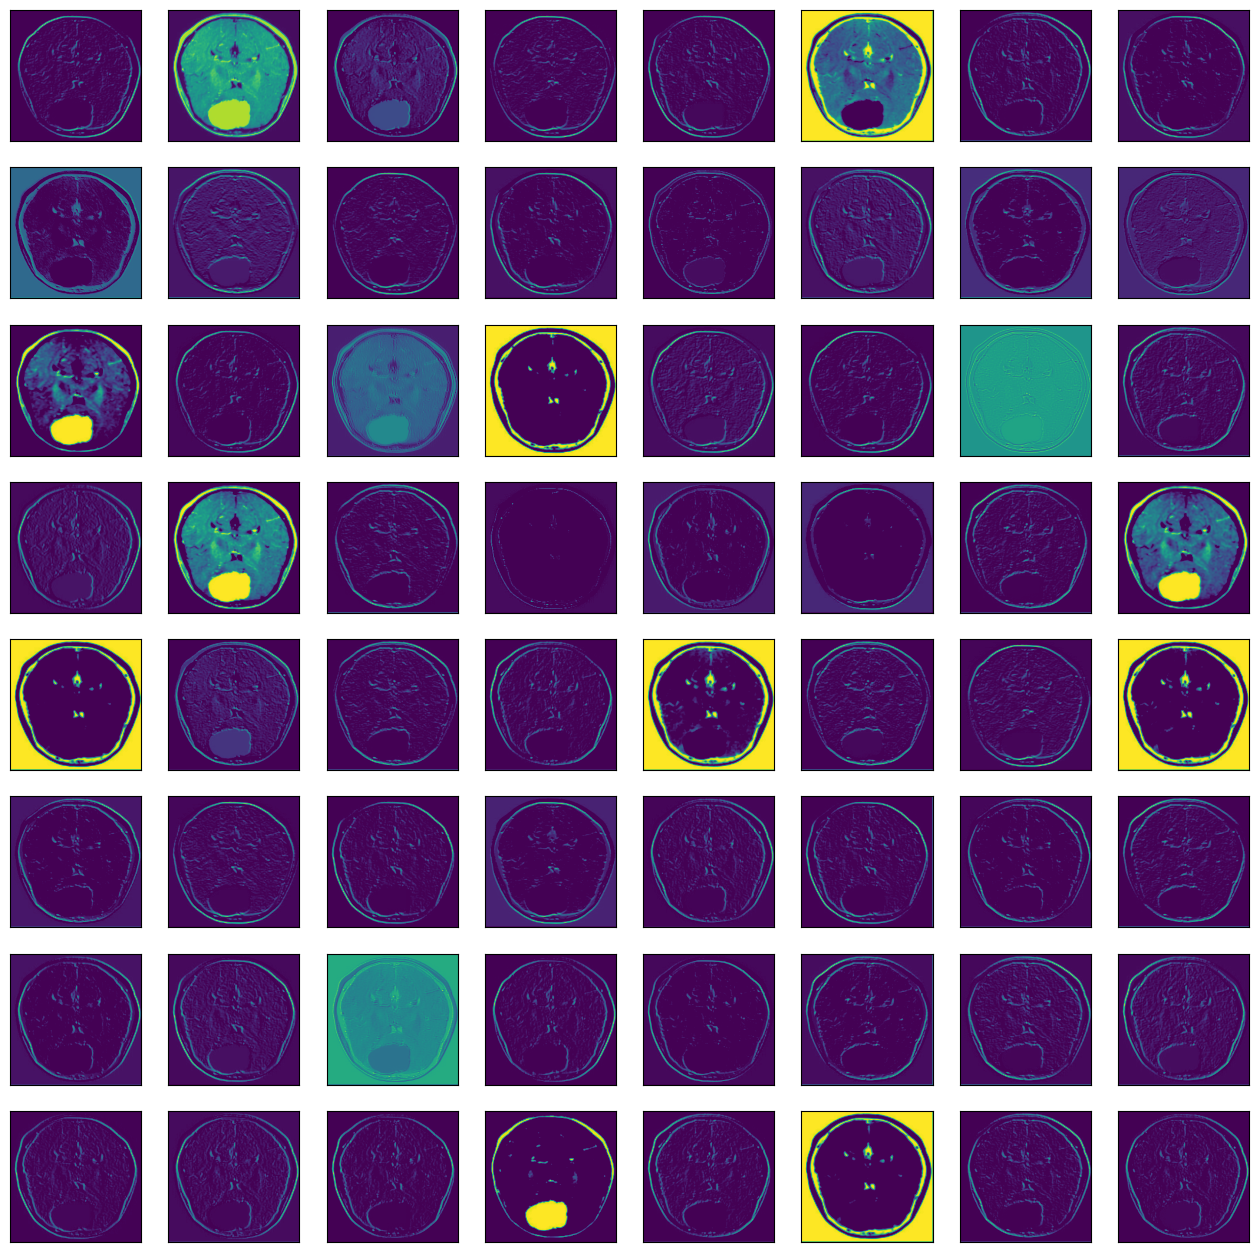

In [18]:
import cv2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from matplotlib import pyplot as plt
from numpy import expand_dims

# Load the VGG16 model
model = VGG16()S

# Redefine the model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

# Load the image using OpenCV
img = cv2.imread("C:\\Users\\vaibh\\Desktop\\new\\datasets\\yes\\y4.jpg")

# Resize the image to the input size expected by VGG16
img = cv2.resize(img, (224, 224))

# Convert the image to an array
img = img_to_array(img)

# Expand dimensions to represent a single 'sample'
img = expand_dims(img, axis=0)

# Prepare the image (e.g. scale pixel values for VGG)
img = preprocess_input(img)

# Get feature map for the first hidden layer
feature_maps = model.predict(img)

# Plot all 64 maps in an 8x8 grid
square = 8
plt.figure(figsize=(16,16))
ix = 1
for _ in range(square):
    for _ in range(square):
        # Specify subplot and turn off axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
        ix += 1

# Show the figure
plt.show()


19/19 [==============================] - 32s 2s/step - loss: 0.2097 - accuracy: 0.9800
Test Accuracy: 98.00%


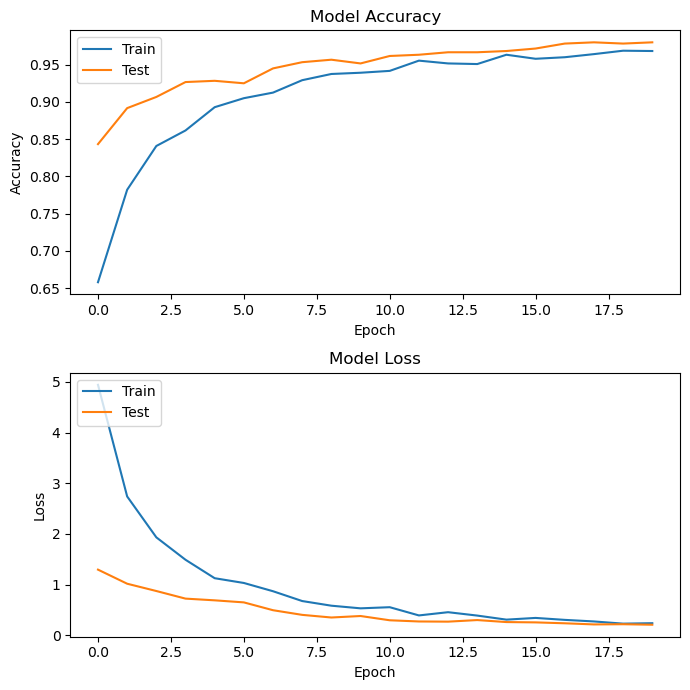

In [19]:
# Evaluate the model
loss, accuracy = vgg16.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(7,7))

# Plot training & validation accuracy values
plt.subplot(211)
plt.plot(vgg16_history.history['accuracy'])
plt.plot(vgg16_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(212)
plt.plot(vgg16_history.history['loss'])
plt.plot(vgg16_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions from the VGG16 model
vgg16_predictions = vgg16.predict(x_test)

# Convert predictions to binary values (0 or 1)
vgg16_predictions_binary = (vgg16_predictions > 0.5).astype(int)

# Flatten the true labels (y_test) and predicted labels (vgg16_predictions_binary)
y_test_flattened = y_test.flatten()
vgg16_predictions_flattened = vgg16_predictions_binary.flatten()

# Calculate metrics
accuracy = accuracy_score(y_test_flattened, vgg16_predictions_flattened)
precision = precision_score(y_test_flattened, vgg16_predictions_flattened)
recall = recall_score(y_test_flattened, vgg16_predictions_flattened)
f1 = f1_score(y_test_flattened, vgg16_predictions_flattened)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


19/19 [==============================] - 32s 2s/step
Accuracy: 0.98
Precision: 0.9803921568627451
Recall: 0.9727626459143969
F1 Score: 0.9765625


### Inception V3 Model

In [21]:
# load base model
from tensorflow.keras.applications import InceptionV3


InceptionV3_weight_path = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
inceptionV3 = InceptionV3(
     weights=InceptionV3_weight_path,
    include_top=False, 
    input_shape=IMG_SIZE + (3,)
)

In [22]:
NUM_CLASSES = 1

inception_v3 = Sequential()
inception_v3.add(inceptionV3)
inception_v3.add(layers.Dropout(0.3))
inception_v3.add(layers.Flatten())
inception_v3.add(layers.Dropout(0.5))
inception_v3.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

inception_v3.layers[0].trainable = False

inception_v3.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

inception_v3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_3 (Dropout)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51201     
                                                                 
Total params: 21853985 (83.37 MB)
Trainable params: 51201 (200.00 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [23]:
import time

start = time.time()

inception_v3_history = inception_v3.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test)
)

end = time.time()
print(end - start)

Epoch 1/20
75/75 [==============================] - 56s 678ms/step - loss: 10.1666 - accuracy: 0.6271 - val_loss: 3.1149 - val_accuracy: 0.7833
Epoch 2/20
75/75 [==============================] - 36s 481ms/step - loss: 7.0423 - accuracy: 0.7158 - val_loss: 1.5100 - val_accuracy: 0.8567
Epoch 3/20
75/75 [==============================] - 34s 455ms/step - loss: 5.4462 - accuracy: 0.7650 - val_loss: 1.1009 - val_accuracy: 0.8900
Epoch 4/20
75/75 [==============================] - 35s 464ms/step - loss: 5.0071 - accuracy: 0.7921 - val_loss: 1.2058 - val_accuracy: 0.8983
Epoch 5/20
75/75 [==============================] - 36s 479ms/step - loss: 4.5911 - accuracy: 0.8092 - val_loss: 3.4410 - val_accuracy: 0.8200
Epoch 6/20
75/75 [==============================] - 36s 481ms/step - loss: 3.8218 - accuracy: 0.8208 - val_loss: 1.2107 - val_accuracy: 0.9117
Epoch 7/20
75/75 [==============================] - 36s 487ms/step - loss: 3.7442 - accuracy: 0.8321 - val_loss: 1.9865 - val_accuracy: 0.871

19/19 [==============================] - 7s 348ms/step - loss: 0.5182 - accuracy: 0.9517
Test Accuracy: 95.17%


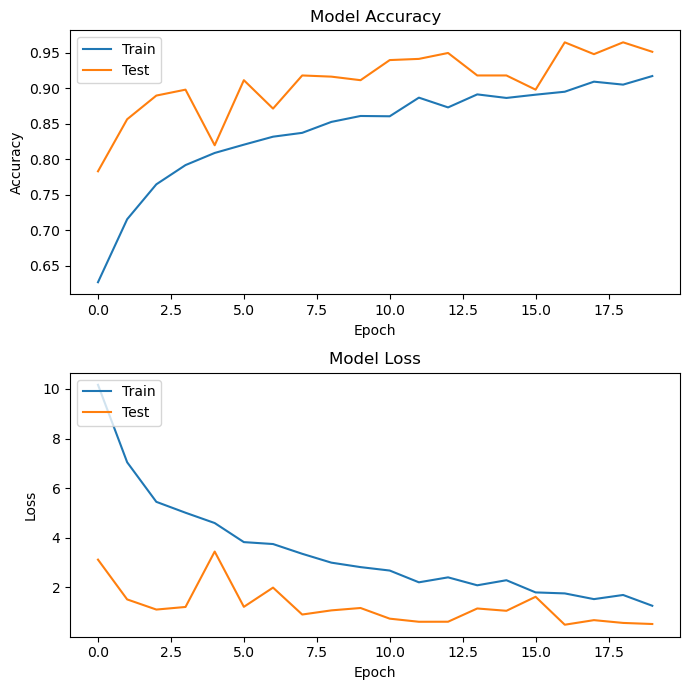

In [24]:
# Evaluate the model
loss, accuracy = inception_v3.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(7,7))

# Plot training & validation accuracy values
plt.subplot(211)
plt.plot(inception_v3_history.history['accuracy'])
plt.plot(inception_v3_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(212)
plt.plot(inception_v3_history.history['loss'])
plt.plot(inception_v3_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions from the InceptionV3 model
inception_v3_predictions = inception_v3.predict(x_test)

# Convert predictions to binary values (0 or 1)
inception_v3_predictions_binary = (inception_v3_predictions > 0.5).astype(int)

# Flatten the true labels (y_test) and predicted labels (inception_v3_predictions_binary)
y_test_flattened = y_test.flatten()
inception_v3_predictions_flattened = inception_v3_predictions_binary.flatten()

# Calculate metrics
accuracy = accuracy_score(y_test_flattened, inception_v3_predictions_flattened)
precision = precision_score(y_test_flattened, inception_v3_predictions_flattened)
recall = recall_score(y_test_flattened, inception_v3_predictions_flattened)
f1 = f1_score(y_test_flattened, inception_v3_predictions_flattened)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

19/19 [==============================] - 7s 341ms/step
Accuracy: 0.9516666666666667
Precision: 0.9453125
Recall: 0.9416342412451362
F1 Score: 0.9434697855750488


### Xception Model

In [26]:
# load base model
from tensorflow.keras.applications import Xception

xception_weight_path = 'xception_weights_tf_dim_ordering_tf_kernels_notop.h5'

xception = Xception(
    weights=xception_weight_path,
    include_top=False,
    input_shape=IMG_SIZE + (3,)
)


In [27]:
NUM_CLASSES = 1

xception_model = Sequential()
xception_model.add(xception)
xception_model.add(layers.Dropout(0.3))
xception_model.add(layers.Flatten())
xception_model.add(layers.Dropout(0.5))
xception_model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

xception_model.layers[0].trainable = False

xception_model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

xception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dropout_5 (Dropout)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 100353    
                                                                 
Total params: 20961833 (79.96 MB)
Trainable params: 100353 (392.00 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [28]:
import time

start = time.time()

xception_history = xception_model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test)
)

end = time.time()
print(end - start)

Epoch 1/20
75/75 [==============================] - 82s 1s/step - loss: 3.9788 - accuracy: 0.6488 - val_loss: 0.9543 - val_accuracy: 0.8217
Epoch 2/20
75/75 [==============================] - 84s 1s/step - loss: 2.9949 - accuracy: 0.7292 - val_loss: 1.2711 - val_accuracy: 0.8000
Epoch 3/20
75/75 [==============================] - 81s 1s/step - loss: 2.0624 - accuracy: 0.7817 - val_loss: 0.9516 - val_accuracy: 0.8500
Epoch 4/20
75/75 [==============================] - 88s 1s/step - loss: 1.7776 - accuracy: 0.8067 - val_loss: 0.6034 - val_accuracy: 0.8800
Epoch 5/20
75/75 [==============================] - 81s 1s/step - loss: 1.4593 - accuracy: 0.8263 - val_loss: 1.1959 - val_accuracy: 0.8250
Epoch 6/20
75/75 [==============================] - 81s 1s/step - loss: 1.1553 - accuracy: 0.8529 - val_loss: 0.5673 - val_accuracy: 0.9017
Epoch 7/20
75/75 [==============================] - 83s 1s/step - loss: 1.2607 - accuracy: 0.8492 - val_loss: 0.4419 - val_accuracy: 0.9200
Epoch 8/20
75/75 [==

19/19 [==============================] - 16s 851ms/step - loss: 0.4579 - accuracy: 0.9217
Test Accuracy: 92.17%


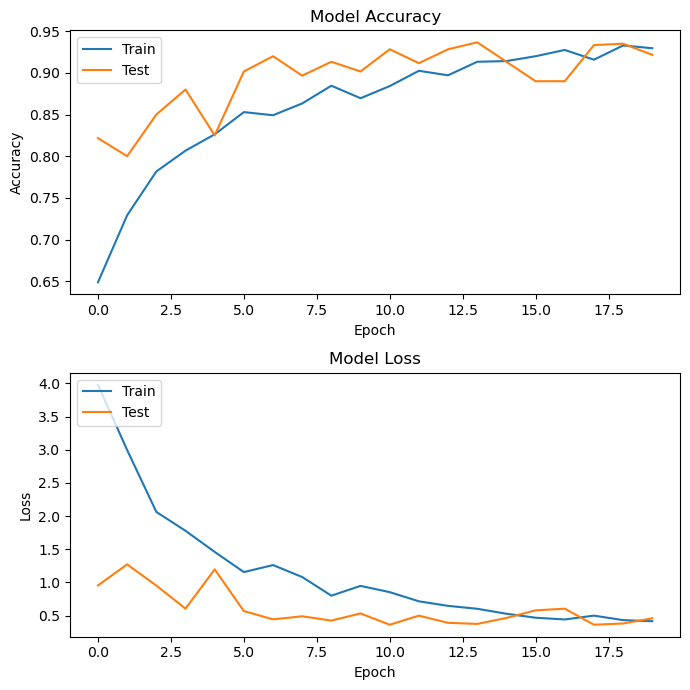

In [29]:
# Evaluate the model
loss, accuracy = xception_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(7,7))

# Plot training & validation accuracy values
plt.subplot(211)
plt.plot(xception_history.history['accuracy'])
plt.plot(xception_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(212)
plt.plot(xception_history.history['loss'])
plt.plot(xception_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions from the Xception model
xception_predictions = xception_model.predict(x_test)

# Convert predictions to binary values (0 or 1)
xception_predictions_binary = (xception_predictions > 0.5).astype(int)

# Flatten the true labels (y_test) and predicted labels (xception_predictions_binary)
y_test_flattened = y_test.flatten()
xception_predictions_flattened = xception_predictions_binary.flatten()

# Calculate metrics
accuracy = accuracy_score(y_test_flattened, xception_predictions_flattened)
precision = precision_score(y_test_flattened, xception_predictions_flattened)
recall = recall_score(y_test_flattened, xception_predictions_flattened)
f1 = f1_score(y_test_flattened, xception_predictions_flattened)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

19/19 [==============================] - 16s 798ms/step
Accuracy: 0.9216666666666666
Precision: 0.8671328671328671
Recall: 0.9649805447470817
F1 Score: 0.9134438305709024


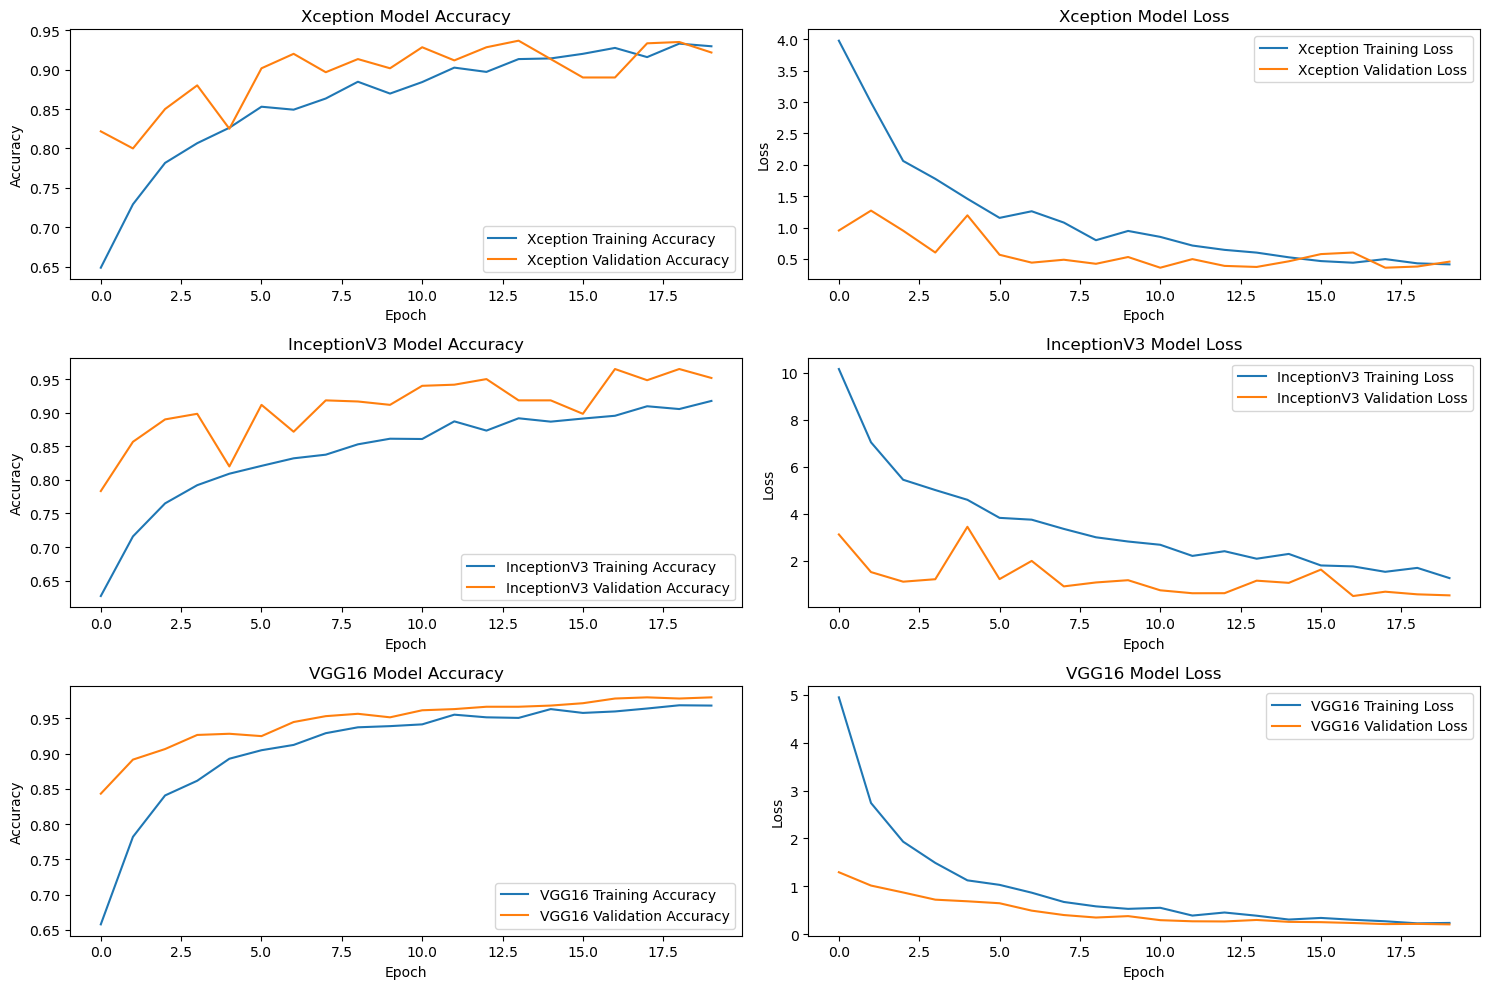

In [31]:
# Plotting accuracy and loss for multiple models
plt.figure(figsize=(15, 10))

# Plot accuracy for Xception
plt.subplot(3, 2, 1)
plt.plot(xception_history.history['accuracy'], label='Xception Training Accuracy')
plt.plot(xception_history.history['val_accuracy'], label='Xception Validation Accuracy')
plt.title('Xception Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss for Xception
plt.subplot(3, 2, 2)
plt.plot(xception_history.history['loss'], label='Xception Training Loss')
plt.plot(xception_history.history['val_loss'], label='Xception Validation Loss')
plt.title('Xception Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy for InceptionV3
plt.subplot(3, 2, 3)
plt.plot(inception_v3_history.history['accuracy'], label='InceptionV3 Training Accuracy')
plt.plot(inception_v3_history.history['val_accuracy'], label='InceptionV3 Validation Accuracy')
plt.title('InceptionV3 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss for InceptionV3
plt.subplot(3, 2, 4)
plt.plot(inception_v3_history.history['loss'], label='InceptionV3 Training Loss')
plt.plot(inception_v3_history.history['val_loss'], label='InceptionV3 Validation Loss')
plt.title('InceptionV3 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy for VGG16
plt.subplot(3, 2, 5)
plt.plot(vgg16_history.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss for VGG16
plt.subplot(3, 2, 6)
plt.plot(vgg16_history.history['loss'], label='VGG16 Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='VGG16 Validation Loss')
plt.title('VGG16 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

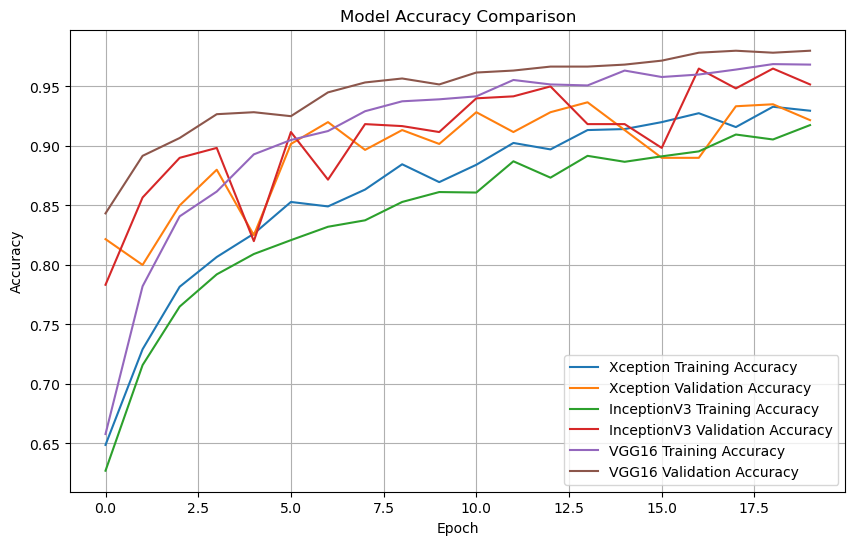

In [32]:
# Plotting accuracy comparison for all models
plt.figure(figsize=(10, 6))

# Plot accuracy for Xception
plt.plot(xception_history.history['accuracy'], label='Xception Training Accuracy')
plt.plot(xception_history.history['val_accuracy'], label='Xception Validation Accuracy')

# Plot accuracy for InceptionV3
plt.plot(inception_v3_history.history['accuracy'], label='InceptionV3 Training Accuracy')
plt.plot(inception_v3_history.history['val_accuracy'], label='InceptionV3 Validation Accuracy')

# Plot accuracy for VGG16
plt.plot(vgg16_history.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 Validation Accuracy')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()